In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\hp\Downloads\ML Project1_BMP\bank-marketing.csv')
data.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
data.shape

(45211, 19)

In [4]:
data.columns

Index(['age', 'job', 'salary', 'marital', 'education', 'targeted', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

Response is out target variable and other columns are independent features

In [5]:
data.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


8 are numerical columns and 11 are categorical columns

# Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in values?

In [7]:
data['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

Minimum is -1 and so atleast 75% values are -1 hence there must be fishy in the dataset

Dropping the pdays value == -1

In [8]:
data = data.drop(data[data.pdays==-1].index)
data.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes


In [9]:
data.shape

(8257, 19)

# Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

In [10]:
data['pdays'].describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

Now the mean, median doesnt look hack and seems relavent.

# Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

In [11]:
data.groupby(['education'])['balance'].agg(np.median)

education
primary      520
secondary    527
tertiary     775
unknown      782
Name: balance, dtype: int64

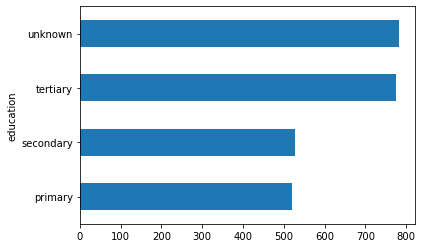

In [12]:
data.groupby(['education'])['balance'].agg(np.median).plot(kind = 'barh')

# Make a box plot for pdays. Do you see any outliers?

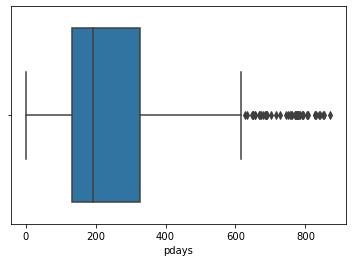

In [13]:
sns.boxplot(data['pdays'])

Some outliers can be seen after 600

# Bivariate Analysis

Convert the response variable to a convenient form

In [14]:
data = data.replace({'response': {'yes': 1,'no':0}})

In [15]:
total_cols = data.columns
numerical_cols = data._get_numeric_data().columns.to_list()
numerical_cols

['age',
 'salary',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'response']

In [16]:
cat_cols = set(total_cols)- set(numerical_cols)
cat_cols

{'contact',
 'default',
 'education',
 'housing',
 'job',
 'loan',
 'marital',
 'month',
 'poutcome',
 'targeted'}

In [17]:
list(cat_cols)

['housing',
 'marital',
 'loan',
 'month',
 'default',
 'targeted',
 'job',
 'contact',
 'education',
 'poutcome']

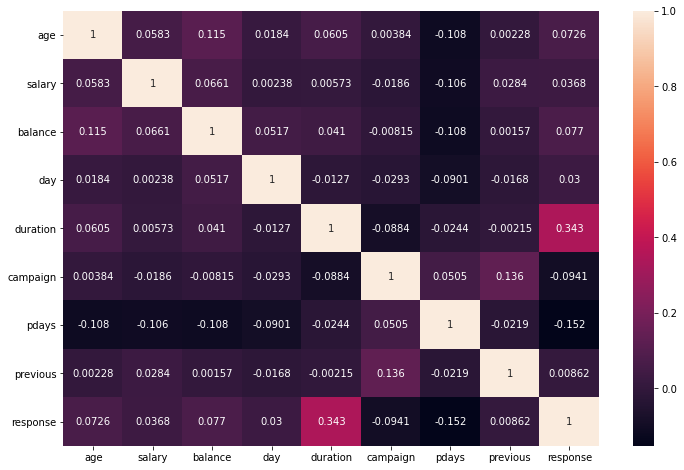

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, fmt='.3g' );

# Boxplot

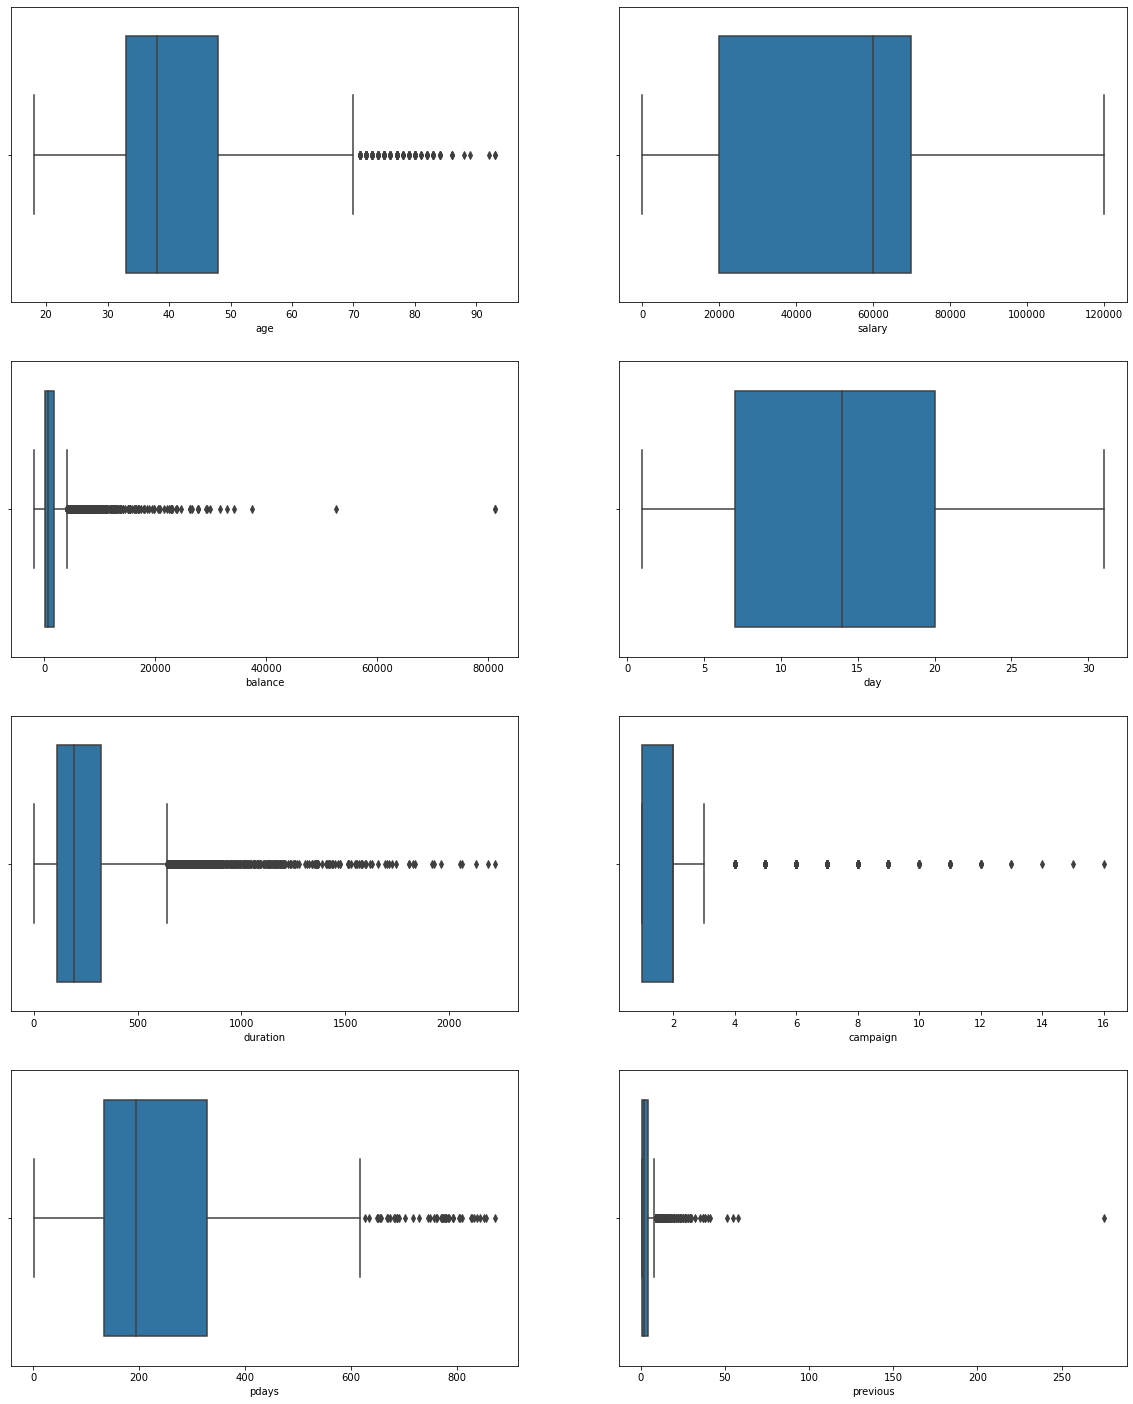

In [19]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 25))
for a, c in list(zip(axes.flat, numerical_cols)):   
    if c != 'response':    
        sns.boxplot(c, data=data, ax=a)

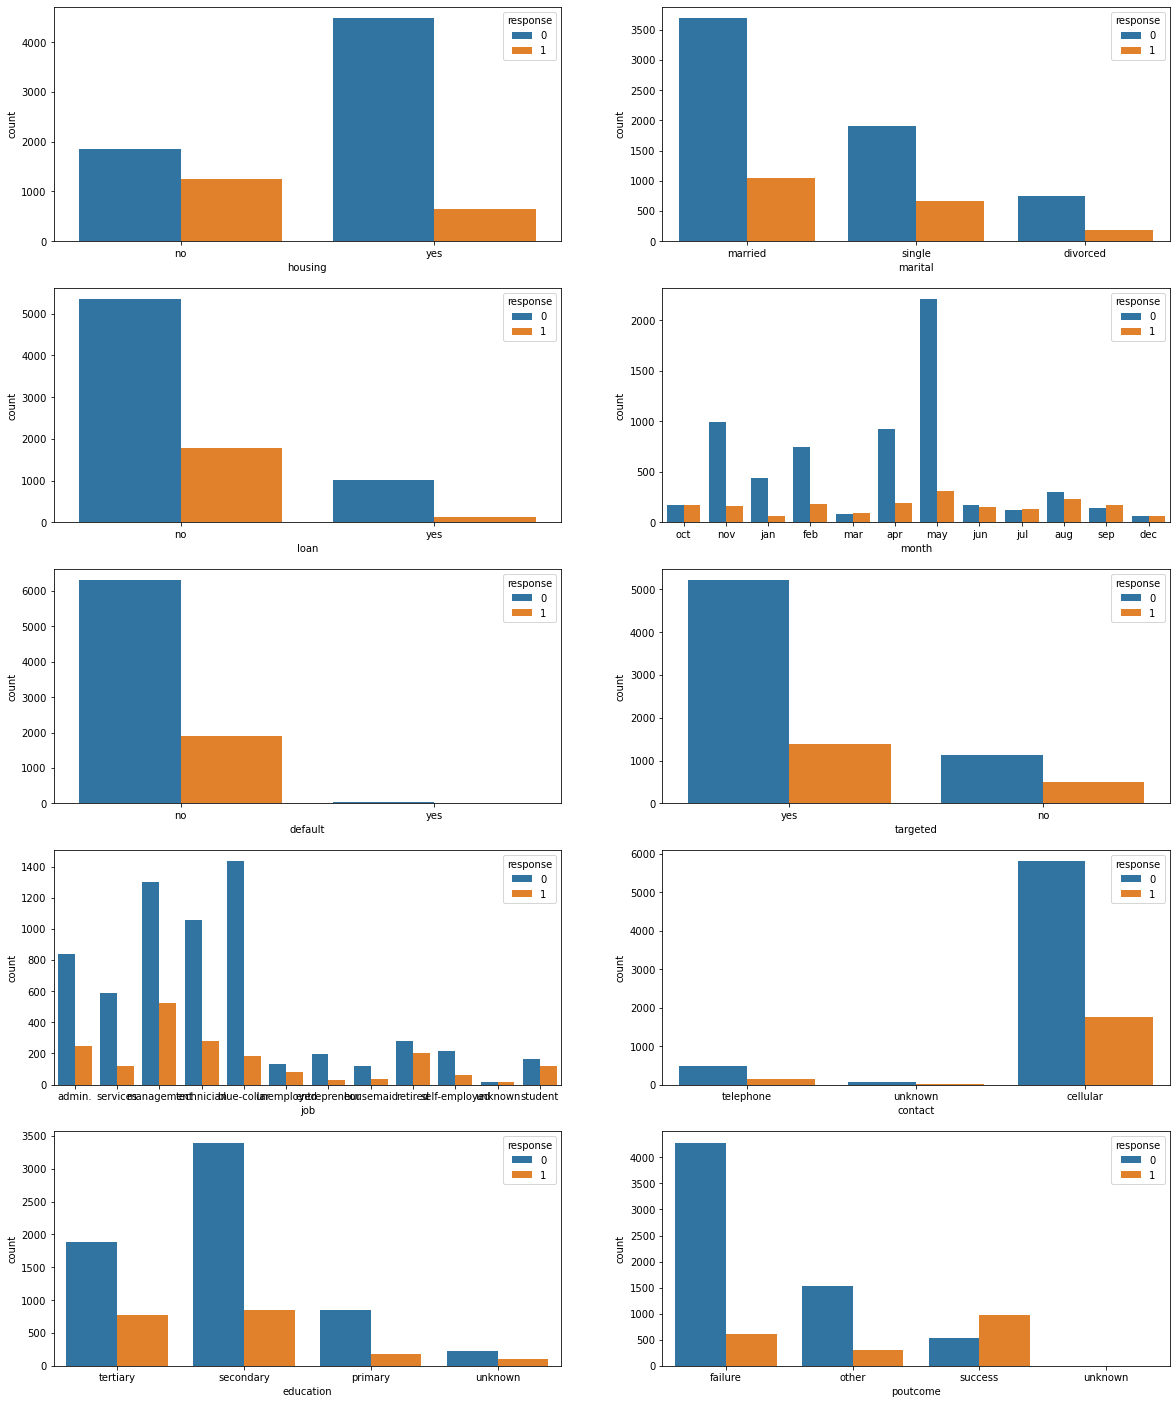

In [20]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 25))

for ax, col in list(zip(axes.flat, cat_cols)):        
    sns.countplot(col, data=data,hue=data['response'], ax=ax)

# Are the features about the previous campaign data useful?

for this we can find correlation between them and response 

In [21]:
data[numerical_cols].corr()['response']

age         0.072577
salary      0.036774
balance     0.076995
day         0.029952
duration    0.342610
campaign   -0.094110
pdays      -0.152206
previous    0.008622
response    1.000000
Name: response, dtype: float64

Most of them are mere realtion with target variable

# Are pdays and poutcome associated with the target? 

Yes, pdays is associated with target; pdays == -1 values has been droped as we are looking into the person who are involved in tha campaign and dropped who have not contacted.

If the previous outcome is success there is a high chance to get successful response again, so i have used poutcome in my final model.

# Before the predictive modeling part, make sure to perform –

In [22]:
#data preprocessing
data.drop(data[data['poutcome']=='unknown'].index, inplace=True)
data.drop(data[data['contact']=='unknown'].index, inplace=True)
data.drop(data[data['job']=='unknown'].index, inplace=True)

In [23]:
data.job = data.job.str.replace('admin.', 'admin')

In [24]:
data[cat_cols]

,housing,marital,loan,month,default,targeted,job,contact,education,poutcome
24060,no,married,no,oct,no,yes,admin,telephone,tertiary,failure
24062,yes,single,yes,oct,no,yes,admin,telephone,secondary,other
24064,yes,married,no,oct,no,yes,services,telephone,secondary,failure
24072,yes,married,no,oct,no,yes,management,telephone,tertiary,other
24077,yes,married,no,oct,no,yes,management,telephone,tertiary,failure
...,...,...,...,...,...,...,...,...,...,...
45199,yes,single,no,nov,no,yes,blue-collar,cellular,secondary,other
45201,no,married,no,nov,no,yes,management,cellular,tertiary,success
45204,no,married,no,nov,no,yes,retired,cellular,secondary,failure
45208,no,married,no,nov,no,yes,retired,cellular,secondary,success


In [25]:
# label encoding the data 
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder() 

for i in cat_cols:
     data[cat_cols][i] = le.fit_transform(data[cat_cols][i])

<ipython-input-25-b3323380b3ed>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cat_cols][i] = le.fit_transform(data[cat_cols][i])


In [26]:
data['job']= le.fit_transform(data['job']) 
data['marital']= le.fit_transform(data['marital'])
data['default']= le.fit_transform(data['default'])
data['loan']= le.fit_transform(data['loan'])
data['poutcome']= le.fit_transform(data['poutcome'])
data['education']= le.fit_transform(data['education']) 
data['targeted']= le.fit_transform(data['targeted'])
data['contact']= le.fit_transform(data['contact'])
data['month']= le.fit_transform(data['month'])
data['housing']= le.fit_transform(data['housing']) 

In [27]:
data.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,0,50000,1,2,1,0,882,0,0,1,21,10,39,1,151,3,0,0
24062,42,0,50000,2,1,1,0,-247,1,1,1,21,10,519,1,166,1,1,1
24064,33,7,70000,1,1,1,0,3444,1,0,1,21,10,144,1,91,4,0,1
24072,36,4,100000,1,2,1,0,2415,1,0,1,22,10,73,1,86,4,1,0
24077,36,4,100000,1,2,1,0,0,1,0,1,23,10,140,1,143,3,0,1


# Train-Test Split

In [28]:
y = data.pop('response')
X = data
y

24060    0
24062    1
24064    1
24072    0
24077    1
        ..
45199    0
45201    1
45204    1
45208    1
45210    0
Name: response, Length: 8149, dtype: int64

In [29]:
X

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
24060,33,0,50000,1,2,1,0,882,0,0,1,21,10,39,1,151,3,0
24062,42,0,50000,2,1,1,0,-247,1,1,1,21,10,519,1,166,1,1
24064,33,7,70000,1,1,1,0,3444,1,0,1,21,10,144,1,91,4,0
24072,36,4,100000,1,2,1,0,2415,1,0,1,22,10,73,1,86,4,1
24077,36,4,100000,1,2,1,0,0,1,0,1,23,10,140,1,143,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,1,20000,2,1,1,0,1475,1,0,0,16,9,1166,3,530,12,1
45201,53,4,100000,1,2,1,0,583,0,0,0,17,9,226,1,184,4,2
45204,73,5,55000,1,1,1,0,2850,0,0,0,17,9,300,1,40,8,0
45208,72,5,55000,1,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2


In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=0)
X_train.shape, y_train.shape

((6111, 18), (6111,))

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train[numerical_cols[:-1]])

StandardScaler()

In [32]:
import warnings
warnings.filterwarnings("ignore")
X_train[numerical_cols[:-1]] = sc.transform(X_train[numerical_cols[:-1]])
X_train.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
44306,0.355030,9,0.068582,1,1,1,0,0.422726,1,0,0,1.600831,5,0.109620,-0.038827,-0.375264,-0.449455,2
32187,-0.609621,9,0.068582,2,1,1,0,0.383173,1,0,0,0.090809,0,-0.432204,-0.038827,0.947101,-0.449455,0
34616,1.056594,0,-0.248131,0,1,1,0,-0.523816,1,0,0,-1.167543,8,-0.062588,-0.676652,1.081124,-0.449455,0
33571,-0.083448,4,1.335438,1,2,1,0,-0.392883,0,0,0,0.719985,0,-0.255796,0.598998,0.929231,-0.241630,0
29589,0.881203,3,-1.324959,1,0,1,0,-0.317527,0,0,0,-1.419213,3,-0.713617,-0.038827,-0.571832,2.252277,0


In [33]:
X_test[numerical_cols[:-1]] = sc.transform(X_test[numerical_cols[:-1]])
X_test.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
38439,0.004248,0,-0.248131,2,1,1,0,0.158813,1,0,0,0.090809,8,-0.373402,-0.038827,1.134734,-0.449455,0
43458,1.845854,6,0.068582,0,2,0,0,-0.521771,1,0,0,-0.160861,0,-0.663214,-0.676652,-0.366329,-0.033804,2
28322,-0.785012,0,-0.248131,2,1,1,0,-0.534728,0,0,0,1.852502,4,0.248226,-0.676652,-0.339525,0.381847,1
41494,-0.785012,4,1.335438,2,2,0,0,0.470122,0,0,0,-0.790037,11,1.084063,-0.676652,-0.822009,-0.241630,0
34618,1.319681,9,0.068582,1,1,1,0,-0.465851,1,0,0,-1.167543,8,-0.255796,-0.038827,0.634379,0.174021,1


# Predictive model 1: Logistic regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score, classification_report
from sklearn.model_selection import cross_val_score

In [35]:
clf = LogisticRegression()

clf.fit(X_train, y_train)

LogisticRegression()

In [36]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
accuracy_score(y_test, y_pred)

0.8267909715407262

df = pd.DataFrame(data, columns = ['y_test', 'y_pred'])
df.head()

In [38]:
precision_score(y_test, y_pred)accuracy_score(y_test, y_pred)

0.6973293768545994

In [39]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.85      0.93      0.89      1552\n           1       0.70      0.48      0.57       486\n\n    accuracy                           0.83      2038\n   macro avg       0.77      0.71      0.73      2038\nweighted avg       0.82      0.83      0.82      2038\n'

In [40]:
confusion_matrix(y_test, y_pred)

array([[1450,  102],
       [ 251,  235]], dtype=int64)

# Use RFE to select top n features in an automated fashion (choose n as you see fit)

In [41]:
from sklearn.feature_selection import RFE
rfe = RFE(clf, 15)

In [42]:
rfe = rfe.fit(X_train, y_train)
ranks = rfe.ranking_
ranks

array([1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1])

In [43]:
print(X_train.columns[rfe.support_])
cols = X_train.columns[rfe.support_]
clf.fit(X_train[cols],y_train)
y_pred2 = clf.predict(X_test[cols])

Index(['age', 'salary', 'marital', 'education', 'targeted', 'default',
       'balance', 'housing', 'loan', 'contact', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')


In [44]:
accuracy_score(y_test, y_pred2)

0.8267909715407262

In [45]:
precision_score(y_test, y_pred2)

0.6950146627565983

In [46]:
classification_report(y_test, y_pred2)

'              precision    recall  f1-score   support\n\n           0       0.85      0.93      0.89      1552\n           1       0.70      0.49      0.57       486\n\n    accuracy                           0.83      2038\n   macro avg       0.77      0.71      0.73      2038\nweighted avg       0.82      0.83      0.82      2038\n'

In [47]:
confusion_matrix(y_test, y_pred2)

array([[1448,  104],
       [ 249,  237]], dtype=int64)

# Using p values and VIF, get rid of the redundant features

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
vif = pd.DataFrame()
vif['features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i).round(2) for i in range(X_train[cols].shape[1])]
vif = vif.sort_values(by='VIF', ascending=True)
vif

,features,VIF
5,default,1.01
13,previous,1.02
10,duration,1.03
6,balance,1.04
11,campaign,1.04
9,contact,1.16
8,loan,1.19
12,pdays,1.20
1,salary,1.23
0,age,1.30


In [50]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
a = sm.add_constant(X_train[cols])
b = y_train

In [51]:
model = sm.OLS(b, a)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     183.2
Date:                Wed, 20 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:53:46   Log-Likelihood:                -2219.6
No. Observations:                6111   AIC:                             4471.
Df Residuals:                    6095   BIC:                             4579.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1789      0.026      6.802      0.0

In [52]:
pvals = []
for i in cols:
    a = round(results.pvalues[i],3)
    pvals.append(a)

a = zip(cols, pvals)
df_pvals = pd.DataFrame(a, columns=['Column', 'pvalues']).sort_values('pvalues')
df_pvals

,Column,pvalues
7,housing,0.000
8,loan,0.000
10,duration,0.000
11,campaign,0.000
14,poutcome,0.000
3,education,0.002
6,balance,0.011
0,age,0.024
2,marital,0.027
9,contact,0.108


In [53]:

final_features = df_pvals.nlargest(8, 'pvalues')['Column'].to_list()
final_features

['targeted',
 'salary',
 'previous',
 'default',
 'pdays',
 'contact',
 'marital',
 'age']

In [54]:
clf.fit(X_train[final_features], y_train)
y_pred3 = clf.predict(X_test[final_features])

In [55]:
accuracy_score(y_test, y_pred3)

0.76153091265947

In [56]:
precision_score(y_test, y_pred3)

0.5

In [57]:
classification_report(y_test, y_pred3)

'              precision    recall  f1-score   support\n\n           0       0.76      1.00      0.86      1552\n           1       0.50      0.00      0.01       486\n\n    accuracy                           0.76      2038\n   macro avg       0.63      0.50      0.44      2038\nweighted avg       0.70      0.76      0.66      2038\n'

In [58]:
confusion_matrix(y_test, y_pred3)

array([[1550,    2],
       [ 484,    2]], dtype=int64)

# Which features are the most important from your model?

In [59]:
from sklearn.feature_selection import SelectFromModel
smf = SelectFromModel(clf)
smf.fit(X_train,y_train)
features = smf.get_support()
feature_name = X_train.columns[features]
feature_name

Index(['default', 'housing', 'loan', 'duration', 'poutcome'], dtype='object')

# Predictive model 2: Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50,max_depth=5)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=50)

In [64]:
y_pred4 = clf.predict(X_test)

In [65]:
accuracy_score(y_test, y_pred4)

0.8233562315996075

In [66]:
precision_score(y_test, y_pred4)

0.7763157894736842

In [67]:
classification_report(y_test, y_pred4)

'              precision    recall  f1-score   support\n\n           0       0.83      0.97      0.89      1552\n           1       0.78      0.36      0.50       486\n\n    accuracy                           0.82      2038\n   macro avg       0.80      0.67      0.69      2038\nweighted avg       0.82      0.82      0.80      2038\n'

In [68]:
confusion_matrix(y_test, y_pred4)

array([[1501,   51],
       [ 309,  177]], dtype=int64)

['poutcome', 'duration', 'housing', 'pdays', 'month']


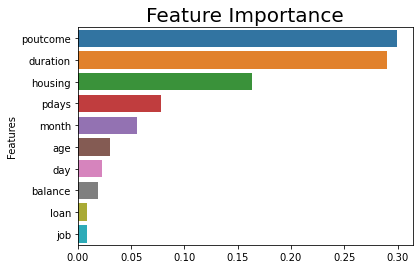

In [70]:
importances=clf.feature_importances_
feature_importances=pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
selected_features = feature_importances.index.to_list()[:5]
print(selected_features)
sns.barplot(x=feature_importances[0:10], y=feature_importances.index[0:10])
plt.title('Feature Importance',size=20)
plt.ylabel("Features")
plt.show()

In [71]:
clf.fit(X_train[selected_features], y_train)
y_pred5 = clf.predict(X_test[selected_features])

In [72]:
accuracy_score(y_test, y_pred5)

0.8395485770363101

In [73]:
precision_score(y_test, y_pred5)

0.7446153846153846

In [74]:
classification_report(y_test, y_pred5)

'              precision    recall  f1-score   support\n\n           0       0.86      0.95      0.90      1552\n           1       0.74      0.50      0.60       486\n\n    accuracy                           0.84      2038\n   macro avg       0.80      0.72      0.75      2038\nweighted avg       0.83      0.84      0.83      2038\n'

In [75]:
confusion_matrix(y_test, y_pred5)

array([[1469,   83],
       [ 244,  242]], dtype=int64)

# Compare the performance of the Random Forest and the logistic mode

In [80]:
print('Logistic Regression\n')
accuracy_score(y_test, y_pred)

Logistic Regression



0.8267909715407262

In [81]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.85      0.93      0.89      1552\n           1       0.70      0.48      0.57       486\n\n    accuracy                           0.83      2038\n   macro avg       0.77      0.71      0.73      2038\nweighted avg       0.82      0.83      0.82      2038\n'

In [82]:
confusion_matrix(y_test, y_pred)

array([[1450,  102],
       [ 251,  235]], dtype=int64)

In [83]:
print('\nRandom Forest Classifier\n')
accuracy_score(y_test, y_pred5)


Random Forest Classifier



0.8395485770363101

In [84]:
classification_report(y_test, y_pred5)

'              precision    recall  f1-score   support\n\n           0       0.86      0.95      0.90      1552\n           1       0.74      0.50      0.60       486\n\n    accuracy                           0.84      2038\n   macro avg       0.80      0.72      0.75      2038\nweighted avg       0.83      0.84      0.83      2038\n'

In [85]:
confusion_matrix(y_test, y_pred5)

array([[1469,   83],
       [ 244,  242]], dtype=int64)

Althogh there is not much difference between both the models still there is very slight better accuracy can be seen in Random forest model than Logistic Regression and less False Negative and Positive values in Random Forest classifier.

                                                      # End